<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/IBMCertifiedAssociateDeveloperQiskit/9.6-Plot_a_Density_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit-visualization
!pip install qiskit-ibm-provider
!pip install imgaug==0.2.5
!pip install pylatexenc

References:
* https://qiskit.org/documentation/stubs/qiskit.visualization.plot_state_qsphere.html
* https://qiskit.org/documentation/tutorials/circuits/2_plotting_data_in_qiskit.html

In [2]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf


#
# Loading IBM credentials
#
API_TOKEN_DIR="/content/drive/'My Drive'/'Colab Notebooks'/QC"
API_TOKEN_FILE="MY_API_TOKEN.txt"

#Mount the google drive first
from google.colab import drive
drive.mount('/content/drive')
#%cd /content/drive/'My Drive'/'Colab Notebooks'/QC
%cd $API_TOKEN_DIR

#Read the MY_API_TOKEN from file...
from qiskit_ibm_provider import IBMProvider
MY_API_TOKEN = ""
with open(API_TOKEN_FILE) as f:
  MY_API_TOKEN=f.readline()
IBMProvider.save_account(MY_API_TOKEN, overwrite=True)

[default]
circuit_drawer = mpl
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/QC


## Plot state qsphere


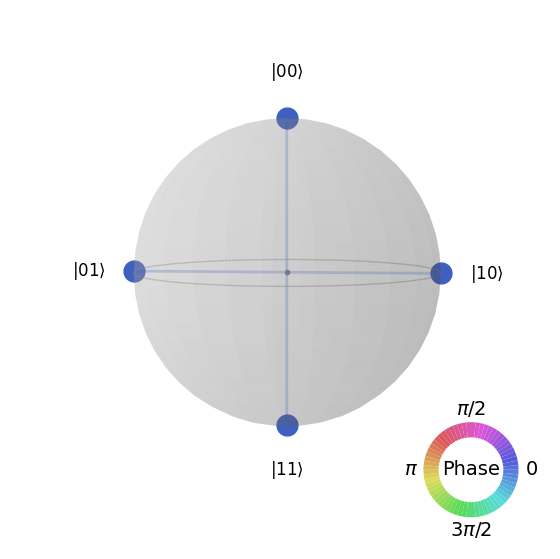

In [13]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere

qc = QuantumCircuit(2)
qc.h([0,1])
plot_state_qsphere(qc)

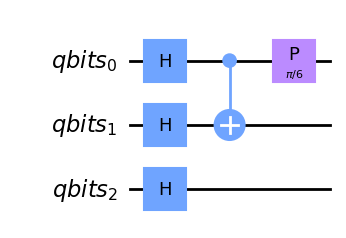

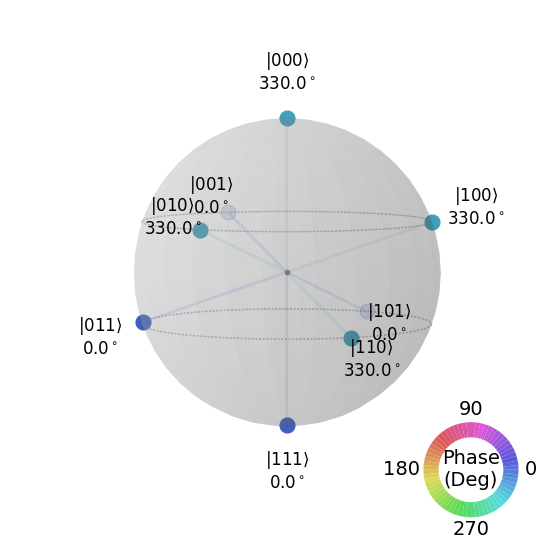

In [12]:
# Differently from bloch sphere, the qsphere can represent entangled states
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info import Statevector

qr = QuantumRegister(3, "qbits")
qc = QuantumCircuit(qr)
qc.h(qr)
qc.cx(0,1)
qc.p(np.pi/6, 0)
display(qc.draw())
sv = Statevector(qc)

plot_state_qsphere(sv, show_state_phases=True, use_degrees=True) #Note the phase quickback on qubit1 in states |010>, |110>

Just an example to get a backend

In [ ]:
provider = IBMProvider(instance="ibm-q/open/main")
backend = provider.get_backend("ibmq_quito")